In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from io import StringIO

# Initialize Dataset

In [63]:
nama_file = "data_anak_stunting_temanggung.csv"
try:
    df = pd.read_csv(nama_file)
    print(f"\n==== 2. Inisialisasi Dataset '{nama_file}' Berhasil ====")
    print("\n==== Info Awal Dataset g====")
    buffer = StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())
    print("\n==== 5 Baris Teratas Data Awal ====")
    print(df.head())
except FileNotFoundError:
    print(f"File '{nama_file}' tidak ditemukan. Harap unggah file tersebut ke Google Colab.")
except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")


==== 2. Inisialisasi Dataset 'data_anak_stunting_temanggung.csv' Berhasil ====

==== Info Awal Dataset g====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2200 non-null   int64  
 1   jenis_data          2200 non-null   object 
 2   id_anak             2200 non-null   object 
 3   jenis_kelamin       2200 non-null   object 
 4   tanggal_lahir       2200 non-null   object 
 5   tanggal_pengukuran  2200 non-null   object 
 6   usia_bulan          2200 non-null   float64
 7   tinggi_badan_cm     2200 non-null   float64
 8   skor_z_haz          2200 non-null   float64
 9   status_stunting     2200 non-null   object 
 10  kecamatan           2200 non-null   object 
 11  desa                2200 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 206.4+ KB


==== 5 Baris Teratas Data Awal 

# exploratory data analysis (EDA)

In [64]:
print("\n==== Informasi Dataset ====")
print(df.info())


==== Informasi Dataset ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2200 non-null   int64  
 1   jenis_data          2200 non-null   object 
 2   id_anak             2200 non-null   object 
 3   jenis_kelamin       2200 non-null   object 
 4   tanggal_lahir       2200 non-null   object 
 5   tanggal_pengukuran  2200 non-null   object 
 6   usia_bulan          2200 non-null   float64
 7   tinggi_badan_cm     2200 non-null   float64
 8   skor_z_haz          2200 non-null   float64
 9   status_stunting     2200 non-null   object 
 10  kecamatan           2200 non-null   object 
 11  desa                2200 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 206.4+ KB
None


# Visualisasi Data

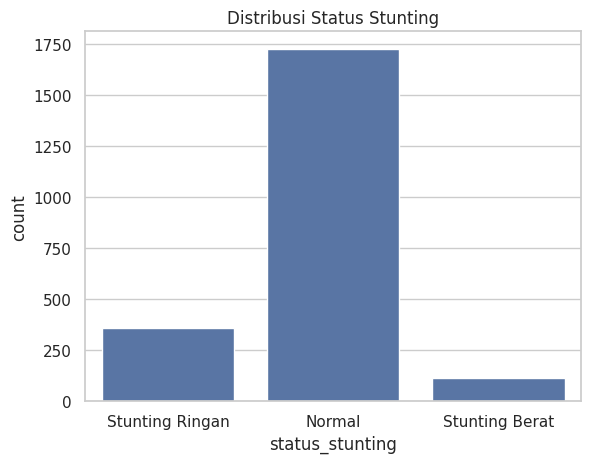

In [65]:
sns.countplot(x='status_stunting', data=df)
plt.title('Distribusi Status Stunting')
plt.show()

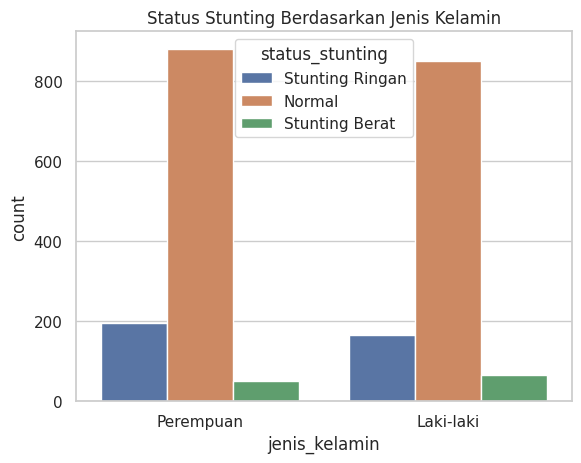

In [66]:
sns.countplot(x='jenis_kelamin', hue='status_stunting', data=df)
plt.title('Status Stunting Berdasarkan Jenis Kelamin')
plt.show()



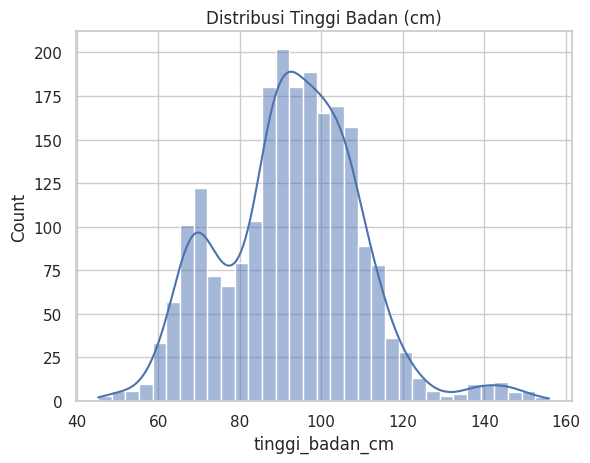

In [67]:
sns.histplot(df['tinggi_badan_cm'], kde=True)
plt.title('Distribusi Tinggi Badan (cm)')
plt.show()



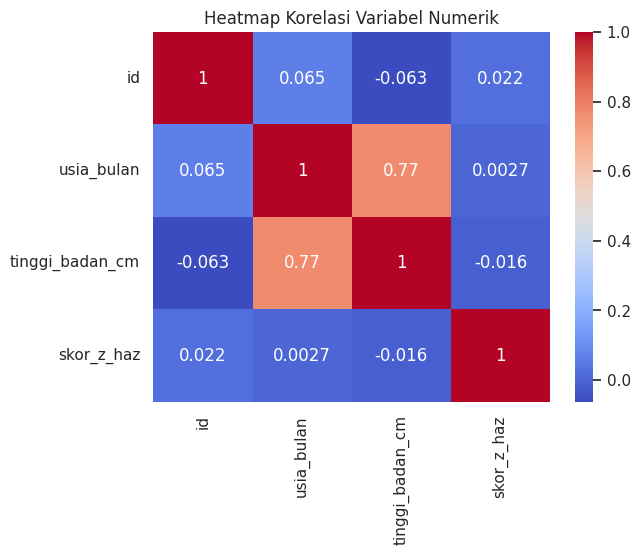

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# Data Processing

In [69]:
print("\n==== 4. Pemrosesan Data (Memilih Fitur & Membuang yang Tidak Perlu) ====")

print("\n==== Menerapkan Konversi Tipe Data ====")
if 'tanggal_lahir' in df.columns:
    df['tanggal_lahir'] = pd.to_datetime(df['tanggal_lahir'], errors='coerce')
if 'tanggal_pengukuran' in df.columns:
    df['tanggal_pengukuran'] = pd.to_datetime(df['tanggal_pengukuran'], errors='coerce')

kategori_cols = ['jenis_data', 'id_anak', 'jenis_kelamin', 'status_stunting', 'kecamatan', 'desa']
for col in kategori_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("\n==== Informasi Dataset Setelah Mengubah Data Type ====")
buffer_post = StringIO()
df.info(buf=buffer_post)
print(buffer_post.getvalue())



features_to_use = ['usia_bu.lan', 'tinggi_badan_cm', 'jenis_kelamin']
target_col = 'status_stunting'

if not all(col in df.columns for col in features_to_use + [target_col]):
    print(f"Error: Tidak semua kolom {features_to_use + [target_col]} ada di DataFrame.")
else:
    target_categories = ['Normal', 'Stunting Ringan', 'Stunting Berat']

    df_model = df[features_to_use + [target_col]].copy()

    print(f"\nMemfilter data untuk target: {target_categories}")
    df_model = df_model[df_model[target_col].isin(target_categories)]
    df_model[target_col] = df_model[target_col].cat.remove_unused_categories()

    print(f"\nJumlah data sebelum dropna: {len(df_model)}")
    df_model.dropna(inplace=True)
    print(f"Jumlah data setelah dropna: {len(df_model)}")

    print(f"\nDistribusi target setelah difilter dan dibersihkan:")
    print(df_model[target_col].value_counts())


==== 4. Pemrosesan Data (Memilih Fitur & Membuang yang Tidak Perlu) ====

==== Menerapkan Konversi Tipe Data ====

==== Informasi Dataset Setelah Mengubah Data Type ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  2200 non-null   int64         
 1   jenis_data          2200 non-null   category      
 2   id_anak             2200 non-null   category      
 3   jenis_kelamin       2200 non-null   category      
 4   tanggal_lahir       2200 non-null   datetime64[ns]
 5   tanggal_pengukuran  2200 non-null   datetime64[ns]
 6   usia_bulan          2200 non-null   float64       
 7   tinggi_badan_cm     2200 non-null   float64       
 8   skor_z_haz          2200 non-null   float64       
 9   status_stunting     2200 non-null   category      
 10  kecamatan           2200 non-null   category 

# Menghapus Kolom Yang Tidak Diperlukan

In [70]:
df = df.drop(['id', 'id_anak', 'tanggal_lahir', 'tanggal_pengukuran'], axis=1, errors='ignore')
print(df.columns.tolist())
print(df.head())

['jenis_data', 'jenis_kelamin', 'usia_bulan', 'tinggi_badan_cm', 'skor_z_haz', 'status_stunting', 'kecamatan', 'desa']
  jenis_data jenis_kelamin  usia_bulan  tinggi_badan_cm  skor_z_haz  \
0       Anak     Perempuan         4.1             52.1       -2.32   
1       Anak     Laki-laki        15.5             79.5       -2.56   
2       Anak     Perempuan        24.6            105.9       -0.73   
3       Anak     Laki-laki        11.5             73.3        0.91   
4       Anak     Laki-laki        29.1            113.2       -0.77   

   status_stunting kecamatan       desa  
0  Stunting Ringan  Gemawang  Tlogorejo  
1  Stunting Ringan  Gemawang  Ngadisepi  
2           Normal  Gemawang     Losari  
3           Normal  Gemawang  Ngadisepi  
4           Normal  Gemawang     Losari  


# Splitting Data

In [71]:
print("\n==== 5. Pemisahan Data (Mentah) ====")
if 'df_model' in locals() and not df_model.empty:
    X = df_model[features_to_use]
    y = df_model[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Ukuran data latih (X_train mentah): {X_train.shape}")
    print(f"Ukuran data uji (X_test mentah): {X_test.shape}")
else:
    print("Error: 'df_model' tidak terdefinisi atau kosong. Jalankan blok 4 terlebih dahulu.")


==== 5. Pemisahan Data (Mentah) ====
Ukuran data latih (X_train mentah): (1760, 3)
Ukuran data uji (X_test mentah): (440, 3)


# Encode

In [79]:
data_jk = df['jenis_kelamin']
encoder = LabelEncoder()

encode_jk = encoder.fit_transform(data_jk)
df_encoded = df.copy()
df_encoded['jenis_kelamin'] = encode_jk
# 1 = Perempuan
# 0 = Laki-laki

display(df_encoded.head())

,jenis_data,jenis_kelamin,usia_bulan,tinggi_badan_cm,skor_z_haz,status_stunting,kecamatan,desa
0,Anak,1,4.1,52.1,-2.32,Stunting Ringan,Gemawang,Tlogorejo
1,Anak,0,15.5,79.5,-2.56,Stunting Ringan,Gemawang,Ngadisepi
2,Anak,1,24.6,105.9,-0.73,Normal,Gemawang,Losari
3,Anak,0,11.5,73.3,0.91,Normal,Gemawang,Ngadisepi
4,Anak,0,29.1,113.2,-0.77,Normal,Gemawang,Losari


# Modelling


==== 7. Model 1: Random Forest Unoptimized ====
=== Random Forest (Unoptimized) ===
Akurasi: 0.7318181818181818
                 precision    recall  f1-score   support

         Normal       0.80      0.91      0.85       345
 Stunting Berat       0.00      0.00      0.00        23
Stunting Ringan       0.21      0.12      0.16        72

       accuracy                           0.73       440
      macro avg       0.34      0.34      0.34       440
   weighted avg       0.66      0.73      0.69       440



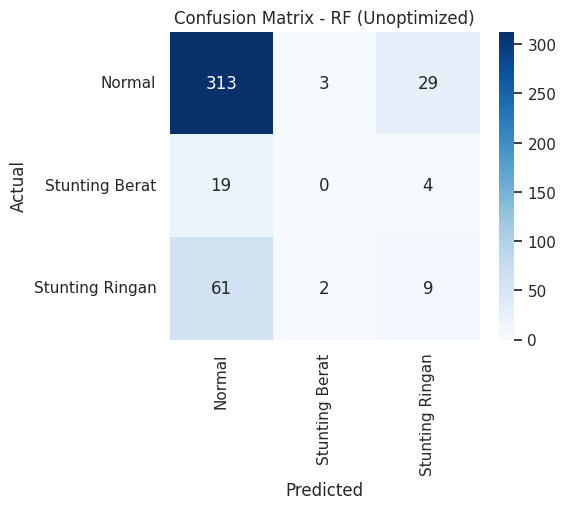

In [74]:
print("\n==== 7. Model 1: Random Forest Unoptimized ====")

rf_unoptimized = RandomForestClassifier(random_state=42)

rf_unoptimized.fit(X_train_processed, y_train_encoded)

y_pred_rf_un = rf_unoptimized.predict(X_test_processed)


acc_rf_un = accuracy_score(y_test_encoded, y_pred_rf_un)
print("=== Random Forest (Unoptimized) ===")
print("Akurasi:", acc_rf_un)

print(classification_report(y_test_encoded, y_pred_rf_un, target_names=list(le.classes_)))

plt.figure(figsize=(5,4))

sns.heatmap(confusion_matrix(y_test_encoded, y_pred_rf_un), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - RF (Unoptimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


==== 8. Model 2: Random Forest GridSearch (Tuned) ====
Memulai GridSearchCV... Ini mungkin memakan waktu beberapa menit.
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Tuning Selesai.

=== Random Forest (Grid Search) ===
Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Akurasi: 0.7840909090909091
                 precision    recall  f1-score   support

         Normal       0.78      1.00      0.88       345
 Stunting Berat       0.00      0.00      0.00        23
Stunting Ringan       0.00      0.00      0.00        72

       accuracy                           0.78       440
      macro avg       0.26      0.33      0.29       440
   weighted avg       0.61      0.78      0.69       440



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


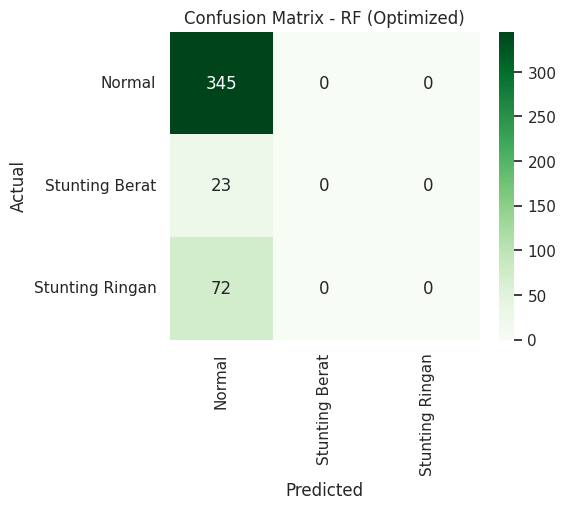

In [75]:
print("\n==== 8. Model 2: Random Forest GridSearch (Tuned) ====")
print("Memulai GridSearchCV... Ini mungkin memakan waktu beberapa menit.")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)


grid_rf.fit(X_train_processed, y_train_encoded)

print("Tuning Selesai.")
best_rf = grid_rf.best_estimator_

y_pred_rf_best = best_rf.predict(X_test_processed)

acc_rf_best = accuracy_score(y_test_encoded, y_pred_rf_best)

print("\n=== Random Forest (Grid Search) ===")
print("Best Params:", grid_rf.best_params_)
print("Akurasi:", acc_rf_best)

print(classification_report(y_test_encoded, y_pred_rf_best, target_names=[str(c) for c in le.classes_]))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_rf_best), annot=True, fmt='d', cmap='Greens',
            xticklabels=[str(c) for c in le.classes_],
            yticklabels=[str(c) for c in le.classes_])
plt.title("Confusion Matrix - RF (Optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


==== 9. Model 3: XGBoost (Tuned dengan RandomizedSearch) ====
Memulai RandomizedSearchCV... Ini mungkin memakan waktu.
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:02:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuning Selesai.

=== XGBoost (Tuned) ===
Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Akurasi: 0.7840909090909091
                 precision    recall  f1-score   support

         Normal       0.78      1.00      0.88       345
 Stunting Berat       0.00      0.00      0.00        23
Stunting Ringan       0.00      0.00      0.00        72

       accuracy                           0.78       440
      macro avg       0.26      0.33      0.29       440
   weighted avg       0.61      0.78      0.69       440



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


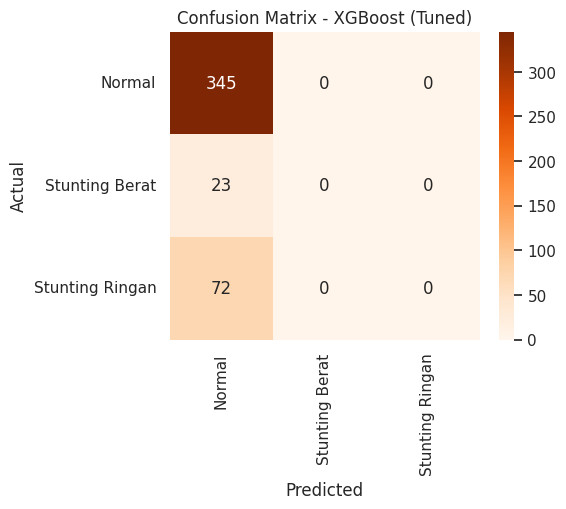

In [76]:
# ====================================================================
# BLOK 9: MODEL 3 - XGBOOST (TUNED)
# ====================================================================

print("\n==== 9. Model 3: XGBoost (Tuned dengan RandomizedSearch) ====")
print("Memulai RandomizedSearchCV... Ini mungkin memakan waktu.")

try:

    xgb_model = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(le.classes_),
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    )

    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0],
    }

    random_xgb = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=20,
        scoring='accuracy',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=2
    )

    random_xgb.fit(X_train_processed, y_train_encoded)

    print("Tuning Selesai.")
    best_xgb = random_xgb.best_estimator_

    y_pred_xgb = best_xgb.predict(X_test_processed)

    acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
    print("\n=== XGBoost (Tuned) ===")
    print("Best Params:", random_xgb.best_params_)
    print("Akurasi:", acc_xgb)

    print(classification_report(y_test_encoded, y_pred_xgb, target_names=[str(c) for c in le.classes_]))

    plt.figure(figsize=(5,4))

    sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgb), annot=True, fmt='d', cmap='Oranges',
                xticklabels=[str(c) for c in le.classes_],
                yticklabels=[str(c) for c in le.classes_])
    plt.title("Confusion Matrix - XGBoost (Tuned)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

except NameError as e:
    print(f"\nERROR: Terjadi NameError. Kemungkinan besar Anda belum menjalankan Blok 6.")
    print(f"Pesan Error: {e}")
except Exception as e:
    print(f"\nTerjadi Error: {e}")


==== 10. Perbandingan Akurasi Model ====


/tmp/ipython-input-748276904.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies_percent, palette='viridis')


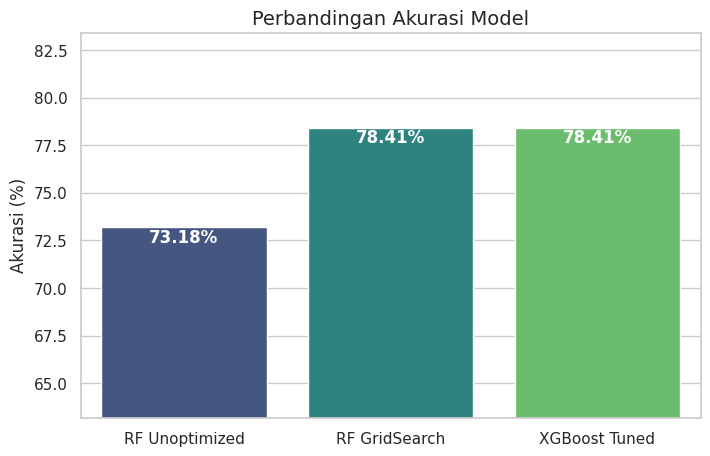


=== Ringkasan Akurasi ===
RF Unoptimized: 73.18%
RF GridSearch: 78.41%
XGBoost Tuned: 78.41%

💡 Interpretasi:
- Model dengan akurasi tertinggi adalah: RF GridSearch (78.41%)
- Model yang di-'tuning' (GridSearch/Tuned) seringkali memberikan akurasi yang lebih baik.

PENTING: Jangan hanya lihat akurasi!
Karena data Anda tidak seimbang (banyak 'Normal'), akurasi tinggi bisa menipu.
Lihat kembali 'Classification Report' & 'Confusion Matrix' dari Blok 7, 8, 9 untuk memeriksa:
  1. Apakah model Anda bisa memprediksi 'Stunting Ringan' & 'Stunting Berat' (Recall > 0)?
  2. Atau model Anda hanya 'menebak' semua anak sebagai 'Normal'?


In [77]:
print("\n==== 10. Perbandingan Akurasi Model ====")

try:
    models = ['RF Unoptimized', 'RF GridSearch', 'XGBoost Tuned']
    accuracies = [acc_rf_un, acc_rf_best, acc_xgb]
    accuracies_percent = [a * 100 for a in accuracies]

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=models, y=accuracies_percent, palette='viridis')
    plt.title("Perbandingan Akurasi Model", fontsize=14)
    plt.ylabel("Akurasi (%)", fontsize=12)

    min_acc = min(accuracies_percent)
    max_acc = max(accuracies_percent)
    plt.ylim(max(0, min_acc - 10), min(100, max_acc + 5))

    for i, v in enumerate(accuracies_percent):
        text_pos = v - (max_acc * 0.01)
        plt.text(i, text_pos, f"{v:.2f}%", ha='center', color='white', fontweight='bold', fontsize=12)

    plt.show()

    print("\n=== Ringkasan Akurasi ===")
    for m, acc in zip(models, accuracies_percent):
        print(f"{m}: {acc:.2f}%")

    print("\n💡 Interpretasi:")
    print(f"- Model dengan akurasi tertinggi adalah: {models[np.argmax(accuracies)]} ({max_acc:.2f}%)")
    print(f"- Model yang di-'tuning' (GridSearch/Tuned) seringkali memberikan akurasi yang lebih baik.")
    print("\nPENTING: Jangan hanya lihat akurasi!")
    print("Karena data Anda tidak seimbang (banyak 'Normal'), akurasi tinggi bisa menipu.")
    print("Lihat kembali 'Classification Report' & 'Confusion Matrix' dari Blok 7, 8, 9 untuk memeriksa:")
    print("  1. Apakah model Anda bisa memprediksi 'Stunting Ringan' & 'Stunting Berat' (Recall > 0)?")
    print("  2. Atau model Anda hanya 'menebak' semua anak sebagai 'Normal'?")

except NameError as e:
    print("\n--- ERROR ---")
    print(f"Variabel tidak ditemukan: {e}")
    print("Pastikan Anda telah menjalankan Blok 7, 8, dan 9 setidaknya satu kali sebelum menjalankan blok ini.")
except Exception as e:
    print(f"\nTerjadi error tak terduga: {e}")